# LIMPIEZA DE DATOS AVANZADA 

Se hará los pasos para la limpieza de un dataframe con muchos errores. 

In [14]:
# IMPORTACIÓN DE LIBRERÍAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
# CREACIÓN DE UN DATAFRAME SIN LIMPIEZA 

data = {
    'Nombre': ['Ana', 'Pedro', np.nan, 'Carlos', 'Ana', '  juan  ', 'María', 'Lucas', 'Pedro', 'ANA'],
    'Edad': [23, 45, None, 35, 23, 40, None, 'desconocido', 45, 23],
    'Salario': ['1000', 'NaN', '5500$', '6000', np.nan, '3000$', '4000', 'desconocido', 'NaN', '1000'],
    'Fecha_Ingreso': ['2021-01-05', 'NaN', '2020-03-12', '2019-11-30', '2021/01/05', '2019-02-20', 'NaN', '2020-12-15', '2019-11-30', '2021/01/05'],
    'Genero': ['F', 'M', 'M', 'M', 'f', 'M', None, 'm', 'M', 'F'],
    'Estado': ['Activo', 'Inactivo', np.nan, 'Inactivo', 'Activo', 'activo', 'inactivo', 'Activo', 'Inactivo', 'Activo']
}

df_sucio = pd.DataFrame(data)
df_sucio

,Nombre,Edad,Salario,Fecha_Ingreso,Genero,Estado
0,Ana,23,1000,2021-01-05,F,Activo
1,Pedro,45,NaN,NaN,M,Inactivo
2,NaN,None,5500$,2020-03-12,M,NaN
3,Carlos,35,6000,2019-11-30,M,Inactivo
4,Ana,23,NaN,2021/01/05,f,Activo
5,juan,40,3000$,2019-02-20,M,activo
6,María,None,4000,NaN,None,inactivo
7,Lucas,desconocido,desconocido,2020-12-15,m,Activo
8,Pedro,45,NaN,2019-11-30,M,Inactivo
9,ANA,23,1000,2021/01/05,F,Activo


In [18]:
# VISUALIZAR TIPOS DE DATOS 

df_sucio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nombre         9 non-null      object
 1   Edad           8 non-null      object
 2   Salario        9 non-null      object
 3   Fecha_Ingreso  10 non-null     object
 4   Genero         9 non-null      object
 5   Estado         9 non-null      object
dtypes: object(6)
memory usage: 612.0+ bytes


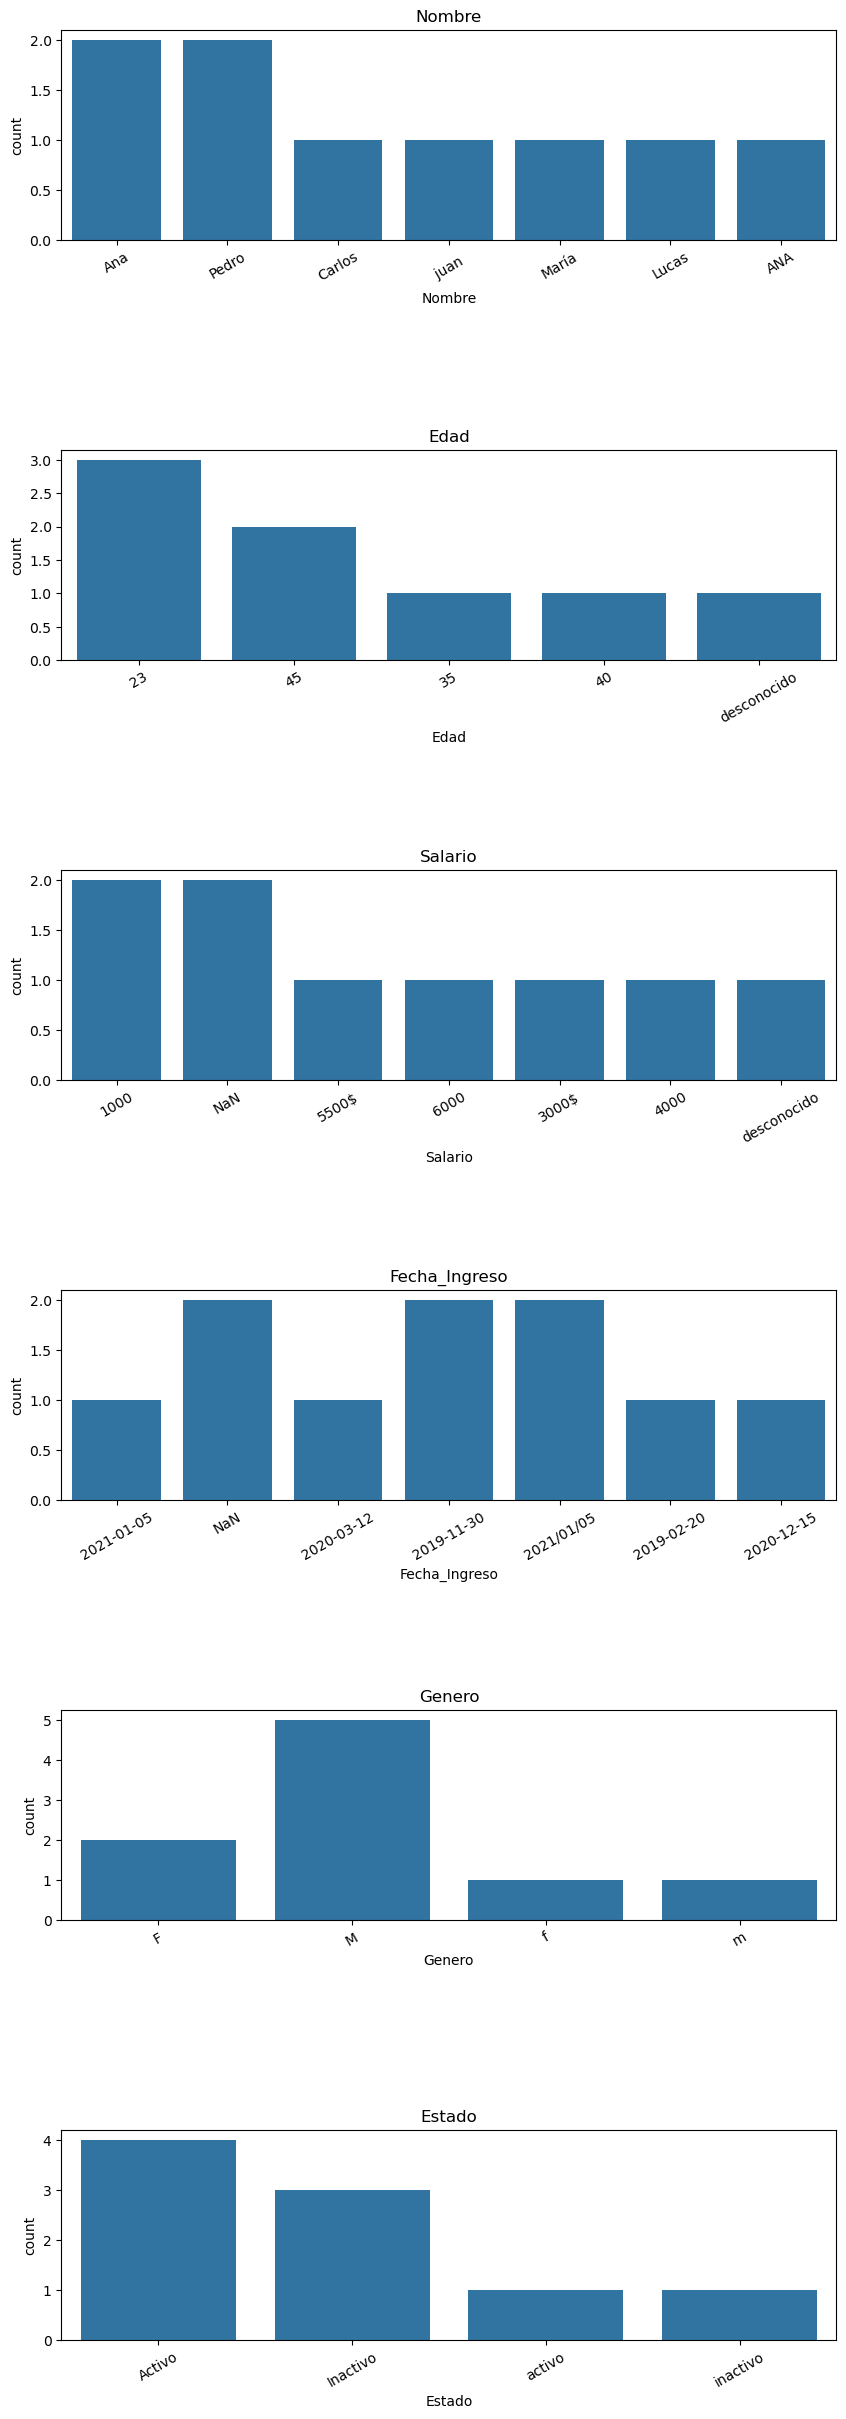

In [20]:
# VALIDAR MODAS DE CADA SUBNIVEL

categoricas = df_sucio.select_dtypes(include='object').columns
fig, ax = plt.subplots(nrows=len(categoricas), ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(categoricas):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ticks = ax[i].get_xticks()
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [22]:
# VALIDAR SUBNIVELES Y FRECUENCIAS DEL DATAFRAME

df_sucio.describe()

,Nombre,Edad,Salario,Fecha_Ingreso,Genero,Estado
count,9,8,9,10,9,9
unique,7,5,7,7,4,4
top,Ana,23,1000,NaN,M,Activo
freq,2,3,2,2,5,4


In [24]:
# ARREGLAR COLUMNA DE NOMBRE

df_sucio['Nombre'] = df_sucio['Nombre'].str.title() # normalizar nombre de JUAn a Juan
df_sucio["Nombre"] = df_sucio["Nombre"].fillna("Ana")
df_sucio

,Nombre,Edad,Salario,Fecha_Ingreso,Genero,Estado
0,Ana,23,1000,2021-01-05,F,Activo
1,Pedro,45,NaN,NaN,M,Inactivo
2,Ana,None,5500$,2020-03-12,M,NaN
3,Carlos,35,6000,2019-11-30,M,Inactivo
4,Ana,23,NaN,2021/01/05,f,Activo
5,Juan,40,3000$,2019-02-20,M,activo
6,María,None,4000,NaN,None,inactivo
7,Lucas,desconocido,desconocido,2020-12-15,m,Activo
8,Pedro,45,NaN,2019-11-30,M,Inactivo
9,Ana,23,1000,2021/01/05,F,Activo


In [26]:
# CONTEO DE NULOS

df_sucio.isna().sum().sort_values(ascending = False)

Edad             2
Salario          1
Genero           1
Estado           1
Nombre           0
Fecha_Ingreso    0
dtype: int64

In [28]:
# IMPUTAR ESTADO CON MODA

df_sucio["Estado"] = df_sucio["Estado"].fillna("Activo")
df_sucio

,Nombre,Edad,Salario,Fecha_Ingreso,Genero,Estado
0,Ana,23,1000,2021-01-05,F,Activo
1,Pedro,45,NaN,NaN,M,Inactivo
2,Ana,None,5500$,2020-03-12,M,Activo
3,Carlos,35,6000,2019-11-30,M,Inactivo
4,Ana,23,NaN,2021/01/05,f,Activo
5,Juan,40,3000$,2019-02-20,M,activo
6,María,None,4000,NaN,None,inactivo
7,Lucas,desconocido,desconocido,2020-12-15,m,Activo
8,Pedro,45,NaN,2019-11-30,M,Inactivo
9,Ana,23,1000,2021/01/05,F,Activo


In [30]:
# CAMBIAR A MAYUSCULAS E IMPUTAR CON MODA COLUMNA GÉNERO 

df_sucio['Genero'] = df_sucio['Genero'].str.upper()
df_sucio["Genero"] = df_sucio["Genero"].fillna("M")
df_sucio

,Nombre,Edad,Salario,Fecha_Ingreso,Genero,Estado
0,Ana,23,1000,2021-01-05,F,Activo
1,Pedro,45,NaN,NaN,M,Inactivo
2,Ana,None,5500$,2020-03-12,M,Activo
3,Carlos,35,6000,2019-11-30,M,Inactivo
4,Ana,23,NaN,2021/01/05,F,Activo
5,Juan,40,3000$,2019-02-20,M,activo
6,María,None,4000,NaN,M,inactivo
7,Lucas,desconocido,desconocido,2020-12-15,M,Activo
8,Pedro,45,NaN,2019-11-30,M,Inactivo
9,Ana,23,1000,2021/01/05,F,Activo


In [32]:
# CONVERTIR EDAD A NÚMERICA E IMPUTAR CON MODA

df_sucio["Edad"] = pd.to_numeric(df_sucio["Edad"], errors= "coerce")
df_sucio["Edad"] = df_sucio["Edad"].fillna(23).astype(int)
df_sucio

,Nombre,Edad,Salario,Fecha_Ingreso,Genero,Estado
0,Ana,23,1000,2021-01-05,F,Activo
1,Pedro,45,NaN,NaN,M,Inactivo
2,Ana,23,5500$,2020-03-12,M,Activo
3,Carlos,35,6000,2019-11-30,M,Inactivo
4,Ana,23,NaN,2021/01/05,F,Activo
5,Juan,40,3000$,2019-02-20,M,activo
6,María,23,4000,NaN,M,inactivo
7,Lucas,23,desconocido,2020-12-15,M,Activo
8,Pedro,45,NaN,2019-11-30,M,Inactivo
9,Ana,23,1000,2021/01/05,F,Activo


In [34]:
# ELIINAR CARACTERES DE SALARIO, REEMPLZAR ESPACIOS EN BLANCO CON NULOS, PASAR A NUMERICA E IM0PUTAR CON PROMEDIO

df_sucio['Salario'] = df_sucio['Salario'].str.replace(r'[^0-9,.]', '', regex=True)
df_sucio['Salario'] = df_sucio['Salario'].replace("", None)
df_sucio["Salario"] = pd.to_numeric(df_sucio["Salario"], errors= "coerce")
df_sucio['Salario'] = df_sucio['Salario'].fillna(df_sucio['Salario'].mean())

In [36]:
# CAMBIAR DE FLOTANTE A ENTERO

df_sucio['Salario'] = df_sucio['Salario'].astype(int)
df_sucio

,Nombre,Edad,Salario,Fecha_Ingreso,Genero,Estado
0,Ana,23,1000,2021-01-05,F,Activo
1,Pedro,45,3416,NaN,M,Inactivo
2,Ana,23,5500,2020-03-12,M,Activo
3,Carlos,35,6000,2019-11-30,M,Inactivo
4,Ana,23,3416,2021/01/05,F,Activo
5,Juan,40,3000,2019-02-20,M,activo
6,María,23,4000,NaN,M,inactivo
7,Lucas,23,3416,2020-12-15,M,Activo
8,Pedro,45,3416,2019-11-30,M,Inactivo
9,Ana,23,1000,2021/01/05,F,Activo


In [38]:
# CAMBIAR EL FORMATO DE FECHA DE TEXTO A FECHA

df_sucio["Fecha_Ingreso"] = pd.to_datetime(df_sucio["Fecha_Ingreso"], format= "mixed")
df_sucio

,Nombre,Edad,Salario,Fecha_Ingreso,Genero,Estado
0,Ana,23,1000,2021-01-05,F,Activo
1,Pedro,45,3416,NaT,M,Inactivo
2,Ana,23,5500,2020-03-12,M,Activo
3,Carlos,35,6000,2019-11-30,M,Inactivo
4,Ana,23,3416,2021-01-05,F,Activo
5,Juan,40,3000,2019-02-20,M,activo
6,María,23,4000,NaT,M,inactivo
7,Lucas,23,3416,2020-12-15,M,Activo
8,Pedro,45,3416,2019-11-30,M,Inactivo
9,Ana,23,1000,2021-01-05,F,Activo


In [40]:
# IMPUTAR NULOS DE FECHA CON MODA

df_sucio['Fecha_Ingreso'] = df_sucio['Fecha_Ingreso'].fillna(pd.Timestamp('2019-11-30'))
df_sucio

,Nombre,Edad,Salario,Fecha_Ingreso,Genero,Estado
0,Ana,23,1000,2021-01-05,F,Activo
1,Pedro,45,3416,2019-11-30,M,Inactivo
2,Ana,23,5500,2020-03-12,M,Activo
3,Carlos,35,6000,2019-11-30,M,Inactivo
4,Ana,23,3416,2021-01-05,F,Activo
5,Juan,40,3000,2019-02-20,M,activo
6,María,23,4000,2019-11-30,M,inactivo
7,Lucas,23,3416,2020-12-15,M,Activo
8,Pedro,45,3416,2019-11-30,M,Inactivo
9,Ana,23,1000,2021-01-05,F,Activo


In [42]:
# ELIMINAR DUPLICADOS DE LA CLUMNA NBOMBRE

df_sucio = df_sucio.drop_duplicates(subset="Nombre")
df_sucio

,Nombre,Edad,Salario,Fecha_Ingreso,Genero,Estado
0,Ana,23,1000,2021-01-05,F,Activo
1,Pedro,45,3416,2019-11-30,M,Inactivo
3,Carlos,35,6000,2019-11-30,M,Inactivo
5,Juan,40,3000,2019-02-20,M,activo
6,María,23,4000,2019-11-30,M,inactivo
7,Lucas,23,3416,2020-12-15,M,Activo


In [44]:
# ORDENAR POR EDAD

df_sucio = df_sucio.sort_values(by = "Edad",ignore_index = True, ascending = True)
df_sucio

,Nombre,Edad,Salario,Fecha_Ingreso,Genero,Estado
0,Ana,23,1000,2021-01-05,F,Activo
1,María,23,4000,2019-11-30,M,inactivo
2,Lucas,23,3416,2020-12-15,M,Activo
3,Carlos,35,6000,2019-11-30,M,Inactivo
4,Juan,40,3000,2019-02-20,M,activo
5,Pedro,45,3416,2019-11-30,M,Inactivo


## EJERCICIO DE LIMPIEZA DOS

In [47]:
# LECTURA DE RUTA DEL DF

ruta = "C:/Users/Julian/Downloads/ventas_limpieza.csv"
df = pd.read_csv(ruta)
df

,ID_Venta,Producto,Cantidad,Precio,Total_Venta,Fecha_Venta
0,1,Lapiz,5.0,1000,5000.0,2023-01-01
1,2,Bolígrafo,10.0,2000,20000.0,2023-01-02
2,3,Cuaderno,15.0,3000,45000.0,2023-01-03
3,4,Lapiz,NaN,1000,NaN,2023-01-04
4,5,Bolgrafo,8.0,2000,16000.0,2023-01-05
5,6,Cuarderno,10.0,3000,NaN,2023-01-06
6,7,Lapiz,5.0,1000,5000.0,2023-01-07
7,8,Cuaderno,NaN,3000,30000.0,2023-01-08
8,9,Boligrafo,7.0,2000,14000.0,2023-01-09
9,10,Cuaderno,10.0,3000,30000.0,2023-01-10


In [53]:
# VALIDACIÓN DE TIPOS DE DATOS 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_Venta     10 non-null     int64  
 1   Producto     10 non-null     object 
 2   Cantidad     8 non-null      float64
 3   Precio       10 non-null     int64  
 4   Total_Venta  8 non-null      float64
 5   Fecha_Venta  10 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 612.0+ bytes


In [49]:
# VALIDACIÓN DE ESTADISTICAS 

df.describe()

,ID_Venta,Cantidad,Precio,Total_Venta
count,10.00000,8.000000,10.000000,8.000000
mean,5.50000,8.750000,2100.000000,20625.000000
std,3.02765,3.284161,875.595036,13752.272539
min,1.00000,5.000000,1000.000000,5000.000000
25%,3.25000,6.500000,1250.000000,11750.000000
50%,5.50000,9.000000,2000.000000,18000.000000
75%,7.75000,10.000000,3000.000000,30000.000000
max,10.00000,15.000000,3000.000000,45000.000000


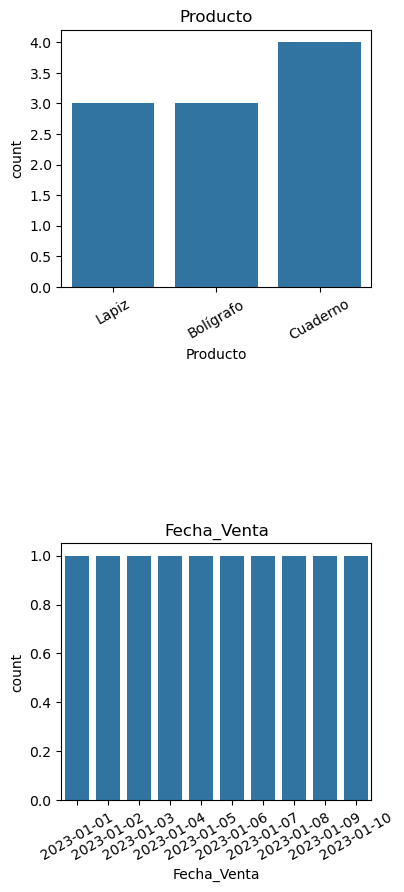

In [67]:
# VALIDAR MODAS DE CADA SUBNIVEL

categoricas = df.select_dtypes(include='object').columns
fig, ax = plt.subplots(nrows=len(categoricas), ncols=1, figsize=(4,10))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(categoricas):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ticks = ax[i].get_xticks()
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [59]:
# IMPUTAR NULOS CON LA MEDIANA EN CANTIDAD Y CAMBIAR A ENTERO 

df["Cantidad"] = df["Cantidad"].fillna(9).astype(int)
df

,ID_Venta,Producto,Cantidad,Precio,Total_Venta,Fecha_Venta
0,1,Lapiz,5,1000,5000,2023-01-01
1,2,Bolígrafo,10,2000,20000,2023-01-02
2,3,Cuaderno,15,3000,45000,2023-01-03
3,4,Lapiz,9,1000,18000,2023-01-04
4,5,Bolgrafo,8,2000,16000,2023-01-05
5,6,Cuarderno,10,3000,18000,2023-01-06
6,7,Lapiz,5,1000,5000,2023-01-07
7,8,Cuaderno,9,3000,30000,2023-01-08
8,9,Boligrafo,7,2000,14000,2023-01-09
9,10,Cuaderno,10,3000,30000,2023-01-10


In [61]:
# IMPUTAR NULOS DE TOTAL DE VENTA CON LA MEDIANA Y CAMBIAR A ENTERO 

df["Total_Venta"] = df["Total_Venta"].fillna(18000).astype(int)
df

,ID_Venta,Producto,Cantidad,Precio,Total_Venta,Fecha_Venta
0,1,Lapiz,5,1000,5000,2023-01-01
1,2,Bolígrafo,10,2000,20000,2023-01-02
2,3,Cuaderno,15,3000,45000,2023-01-03
3,4,Lapiz,9,1000,18000,2023-01-04
4,5,Bolgrafo,8,2000,16000,2023-01-05
5,6,Cuarderno,10,3000,18000,2023-01-06
6,7,Lapiz,5,1000,5000,2023-01-07
7,8,Cuaderno,9,3000,30000,2023-01-08
8,9,Boligrafo,7,2000,14000,2023-01-09
9,10,Cuaderno,10,3000,30000,2023-01-10


In [63]:
# CORREGIR ERRORES DE ORTOGRAFIA DE PRODUCTO

correcciones = {"Cuarderno":"Cuaderno", "Boligrafo":"Bolígrafo", "Bolgrafo":"Bolígrafo"}
df["Producto"] = df["Producto"].replace(correcciones, regex = True)
df 

,ID_Venta,Producto,Cantidad,Precio,Total_Venta,Fecha_Venta
0,1,Lapiz,5,1000,5000,2023-01-01
1,2,Bolígrafo,10,2000,20000,2023-01-02
2,3,Cuaderno,15,3000,45000,2023-01-03
3,4,Lapiz,9,1000,18000,2023-01-04
4,5,Bolígrafo,8,2000,16000,2023-01-05
5,6,Cuaderno,10,3000,18000,2023-01-06
6,7,Lapiz,5,1000,5000,2023-01-07
7,8,Cuaderno,9,3000,30000,2023-01-08
8,9,Bolígrafo,7,2000,14000,2023-01-09
9,10,Cuaderno,10,3000,30000,2023-01-10


In [69]:
import pandas as pd

# Supongamos que tienes un DataFrame con ventas por mes
# Ejemplo de datos
data = {'Fecha': pd.date_range(start='2023-01-01', periods=12, freq='ME'),
        'Ventas': [5000, 7000, 6000, 8000, 7500, 8500, 7000, 9000, 8000, 9500, 9200, 9800]}
df = pd.DataFrame(data)
df

,Fecha,Ventas
0,2023-01-31,5000
1,2023-02-28,7000
2,2023-03-31,6000
3,2023-04-30,8000
4,2023-05-31,7500
5,2023-06-30,8500
6,2023-07-31,7000
7,2023-08-31,9000
8,2023-09-30,8000
9,2023-10-31,9500


In [73]:
# Calcular el promedio móvil de 3 meses
df['MA_3'] = df['Ventas'].rolling(window=3).mean()
df

,Fecha,Ventas,MA_3
0,2023-01-31,5000,NaN
1,2023-02-28,7000,NaN
2,2023-03-31,6000,6000.000000
3,2023-04-30,8000,7000.000000
4,2023-05-31,7500,7166.666667
5,2023-06-30,8500,8000.000000
6,2023-07-31,7000,7666.666667
7,2023-08-31,9000,8166.666667
8,2023-09-30,8000,8000.000000
9,2023-10-31,9500,8833.333333


In [75]:
# Predicción para el siguiente mes usando el promedio de los últimos 3 meses
prediccion = df['MA_3'].iloc[-1]
print(f"Predicción para el próximo mes: {prediccion}")

Predicción para el próximo mes: 9500.0
